In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cftr
import matplotlib.pyplot as plt

import mpl_toolkits.axes_grid1.inset_locator as agi

In [4]:
%matplotlib inline

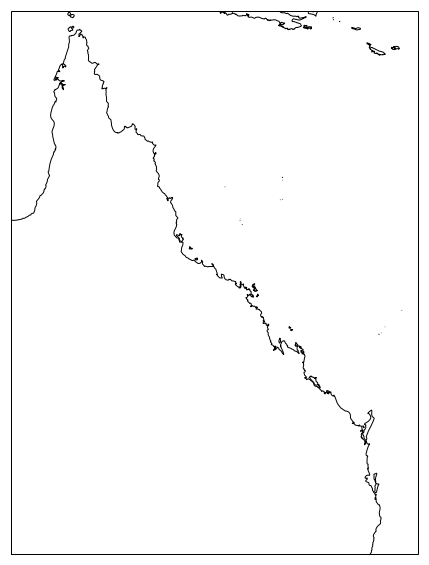

In [6]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines(resolution='10m')

ax.set_extent([140, 155, -30, -10])

plt.show()

In [57]:
def insert_pie_on_map(ax, pie_lon, pie_lat, data, alpha=1.0):
    
    pie_x, pie_y = ccrs.PlateCarree().transform_point(pie_lon, pie_lat, ccrs.PlateCarree())

    ax_sub = agi.inset_axes(ax, 
                            width=0.5, 
                            height=0.5, 
                            loc=10,
                            bbox_to_anchor=(pie_x, pie_y),
                            bbox_transform=ax.transData,
                            borderpad=0,
                           )


    patches, textx = ax_sub.pie(data, )
    [p.set_alpha(alpha) for p in patches]
    ax_sub.set_aspect('equal') 

    return ax_sub
#end insert_pie_on_map

In [79]:
def insert_line_on_map(ax, line_lon, line_lat, datax, datay, alpha=1.0):
    
    line_x, line_y = ccrs.PlateCarree().transform_point(line_lon, line_lat, ccrs.PlateCarree())

    ax_sub = agi.inset_axes(ax, 
                            width=2.0, 
                            height=0.5, 
                            loc=6,
                            bbox_to_anchor=(line_x, line_y),
                            bbox_transform=ax.transData,
                            borderpad=0,
                           )

    ax_sub.plot(datax, datay, alpha=alpha )
    
    ax_sub.set_facecolor('none')
    
    plt.setp(ax_sub.get_xticklabels(), visible=False)
    plt.setp(ax_sub.get_yticklabels(), visible=False)
    plt.setp(ax_sub.get_xticklines(), visible=False)
    plt.setp(ax_sub.get_yticklines(), visible=False)
    plt.setp(ax_sub.spines.values(), visible=False)

    return ax_sub
#end insert_line_on_map

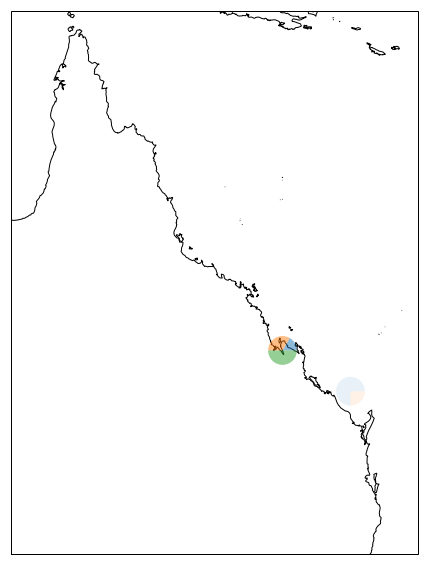

In [63]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())

#ax.add_feature(cftr.LAND)
#ax.add_feature(cftr.OCEAN)
ax.coastlines(resolution='10m')

ax.set_extent([140, 155, -30, -10])

pie_lon = 150
pie_lat = -22.5

insert_pie_on_map(ax, pie_lon, pie_lat, [1,2,3], alpha=0.5)

pie_lon = 152.5
pie_lat = -24

insert_pie_on_map(ax, pie_lon, pie_lat, [9,3], alpha=0.1)
plt.show()

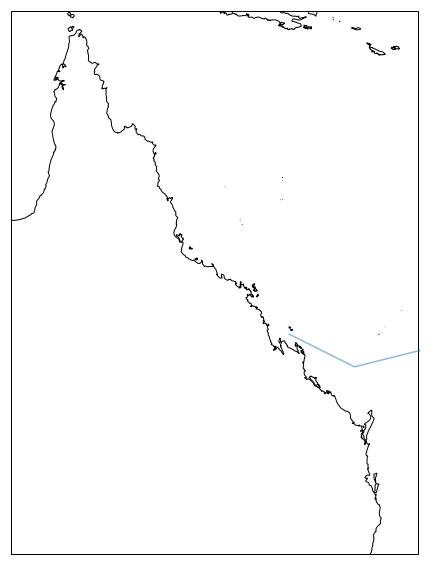

In [80]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())

#ax.add_feature(cftr.LAND)
#ax.add_feature(cftr.OCEAN)
ax.coastlines(resolution='10m')

ax.set_extent([140, 155, -30, -10])

pie_lon = 150
pie_lat = -22.5

insert_line_on_map(ax, pie_lon, pie_lat, [1,2,3], [4, 2, 3], alpha=0.5)

plt.show()

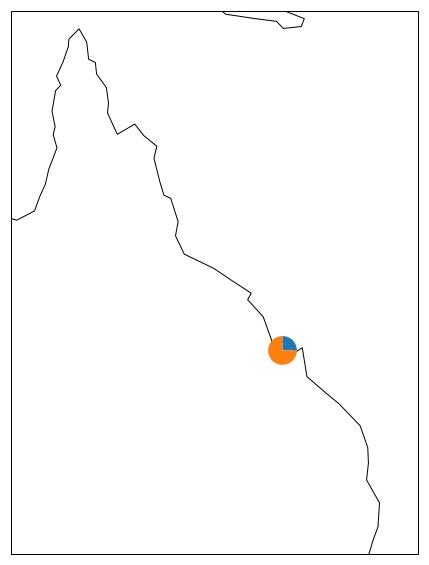

In [39]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_extent([140, 155, -30, -10])
#ax.stock_img() 


def plot_pie_inset(data,ilon,ilat,ax,width):
    ax_sub= inset_axes(ax, width=width, height=width, loc=10, 
                       bbox_to_anchor=(ilon, ilat),
                       bbox_transform=ax.transData, 
                       borderpad=0)
    wedges,texts= ax_sub.pie(data)

    ax_sub.set_aspect("equal")

lon,lat = 150, -22.5
lonr,latr =  ccrs.PlateCarree().transform_point(lon,lat, ccrs.PlateCarree())
plot_pie_inset([0.25, 0.75],lonr,latr,ax,0.5)


plt.show()

In [76]:
ax.set_facecolor?

Signature: ax.set_facecolor(color)
Docstring:
Set the Axes facecolor.

.. ACCEPTS: color

Parameters
----------
color : color
File:      d:\anaconda3\envs\root36\lib\site-packages\matplotlib\axes\_base.py
Type:      method


In [72]:
ax.plot?

Signature: ax.plot(*args, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the  appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', l